In [7]:

from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification  # Add this line
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Rest of your code...



data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

# Extract features (data) and target labels (classes)
X = data.values[:, 1:]  # Assuming the first column is an identifier, not a feature
y = labels.values[:, 1]  # Assuming the first column is an identifier, not a label

X, y = make_classification(n_samples=100, n_features=50, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest with the desired score function (f_classif for classification)
k_best = SelectKBest(score_func=f_classif, k=10)  

# Fit and transform the feature matrix
X_train_k_best = k_best.fit_transform(X_train, y_train)
X_test_k_best = k_best.transform(X_test)

# Print the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]
print("Selected Feature Indices:", selected_feature_indices)
k = 5  # You can adjust the value of k as needed
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn.fit(X_train_k_best, y_train)

# Make predictions
y_pred = knn.predict(X_test_k_best)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

# ... Your previous code ...

# Make predictions
y_pred = knn.predict(X_test_k_best)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



Selected Feature Indices: [ 8  9 13 20 25 28 30 31 39 40]
Accuracy: 90.00%
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


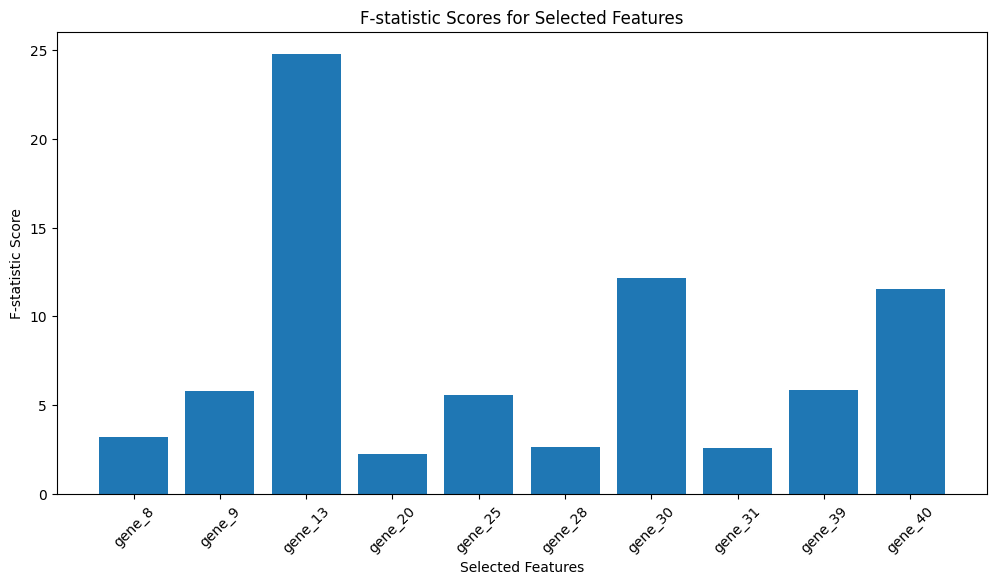

In [4]:
import matplotlib.pyplot as plt

# Assuming X_train has column names, you can use them for labeling the x-axis
feature_names = list(data.columns[1:])  # Assuming the first column is an identifier

# Bar graph for selected features
plt.figure(figsize=(12, 6))
plt.bar(range(len(selected_feature_indices)), k_best.scores_[selected_feature_indices], align="center")
plt.xticks(range(len(selected_feature_indices)), [feature_names[i] for i in selected_feature_indices], rotation=45)
plt.xlabel('Selected Features')
plt.ylabel('F-statistic Score')
plt.title('F-statistic Scores for Selected Features')
plt.show()
